<h1>.<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#kedro" data-toc-modified-id="kedro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>kedro</a></span></li><li><span><a href="#debug" data-toc-modified-id="debug-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>debug</a></span></li></ul></div>

# kedro

In [7]:
data = context.catalog.load("estacoes")

2022-02-27 18:04:03,900 - kedro.io.data_catalog - INFO - Loading data from `estacoes` (CSVDataSet)...


In [8]:
data

,Unnamed: 0,name,station,lat,lon,line,neigh
0,aacd-servidor,Aacd Servidor,aacd-servidor,-23.597825,-46.652374,['lilas'],"['moema', 'hospital-sao-paulo']"
1,adolfo-pinheiro,Adolfo Pinheiro,adolfo-pinheiro,-23.650073,-46.704206,['lilas'],"['largo-treze', 'alto-da-boa-vista']"
2,alto-da-boa-vista,Alto Da Boa Vista,alto-da-boa-vista,-23.641625,-46.699434,['lilas'],"['adolfo-pinheiro', 'borba-gato']"
3,alto-do-ipiranga,Alto Do Ipiranga,alto-do-ipiranga,-23.602237,-46.612486,['verde'],"['santos-imigrantes', 'sacoma']"
4,ana-rosa,Ana Rosa,ana-rosa,-23.581871,-46.638104,"['azul', 'verde']","['paraiso', 'vila-mariana', 'paraiso', 'chacar..."
...,...,...,...,...,...,...,...
74,vila-mariana,Vila Mariana,vila-mariana,-23.589178,-46.634668,['azul'],"['ana-rosa', 'santa-cruz']"
75,vila-matilde,Vila Matilde,vila-matilde,-23.531917,-46.530873,['vermelha'],"['guilhermina-esperanca', 'penha']"
76,vila-prudente,Vila Prudente,vila-prudente,-23.584595,-46.583437,"['prata', 'verde']","['oratorio', 'tamanduatei']"
77,vila-tolstoi,Vila Tolstoi,vila-tolstoi,-23.600902,-46.527121,['prata'],"['camilo-haddad', 'vila-uniao']"


In [9]:
print(context.pipeline.describe())

#### Pipeline execution order ####
Inputs: None



Outputs: None
##################################


/home/dusodeth/.local/lib/python3.8/site-packages/kedro/framework/context/context.py:32: DeprecationWarning: Accessing pipeline via the context will be deprecated in Kedro 0.18.0.
  warn(


# debug

In [10]:
import numpy as np
import pandas as pd
import geopandas, folium

In [11]:
df = data.copy()

In [12]:
colors = { 'azul'    : 'darkblue',
           'verde'   : 'green',
           'vermelha': 'red',
           'amarela' : 'beige',
           'lilas'   : 'purple',
           'prata'   : 'lightgray'}
df.loc[:, 'cor'] = df['line'].apply( lambda x: colors[sorted(x.strip("[]").replace("'", '').replace(" ", "").split(","))[0]] )

df.sample(5)

,Unnamed: 0,name,station,lat,lon,line,neigh,cor
20,chacara-klabin,Chacara Klabin,chacara-klabin,-23.592681,-46.630681,"['lilas', 'verde']","['santa-cruz', 'ana-rosa', 'santos-imigrantes']",purple
35,largo-treze,Largo Treze,largo-treze,-23.654458,-46.710166,['lilas'],"['santo-amaro', 'adolfo-pinheiro']",purple
36,luz,Luz,luz,-23.536059,-46.634181,"['amarela', 'azul']","['republica', 'tiradentes', 'sao-bento']",beige
12,brigadeiro,Brigadeiro,brigadeiro,-23.567728,-46.648937,['verde'],"['trianon-masp', 'paraiso']",green
7,artur-alvim,Artur Alvim,artur-alvim,-23.540244,-46.484706,['vermelha'],"['corinthians-itaquera', 'patriarca-vila-re']",red


In [15]:
centroid = (df['lat'].mean(), df['lon'].mean())
sp = folium.Map( location=(centroid[0], centroid[1]), zoom_start=12 )
for i, r in df.iterrows():
    folium.Marker( location = [r['lat'], r['lon']],
                   icon     = folium.Icon(color=r['cor']),
                   popup    = r['name'] ).add_to(sp)
display( sp )

In [14]:
sp.save("saopaulo.html")

<br/>

In [9]:
import os
import time
from selenium import webdriver
# $ sudo apt-get install firefox-geckodriver

In [11]:
browser = webdriver.Firefox()
browser.get(rf"file://{os.getcwd()}/saopaulo.html")
time.sleep(5)
browser.save_screenshot('saopaulo.png')
browser.quit()

<br/>

In [12]:
from PIL import Image

In [16]:
i = Image.open('saopaulo.png')

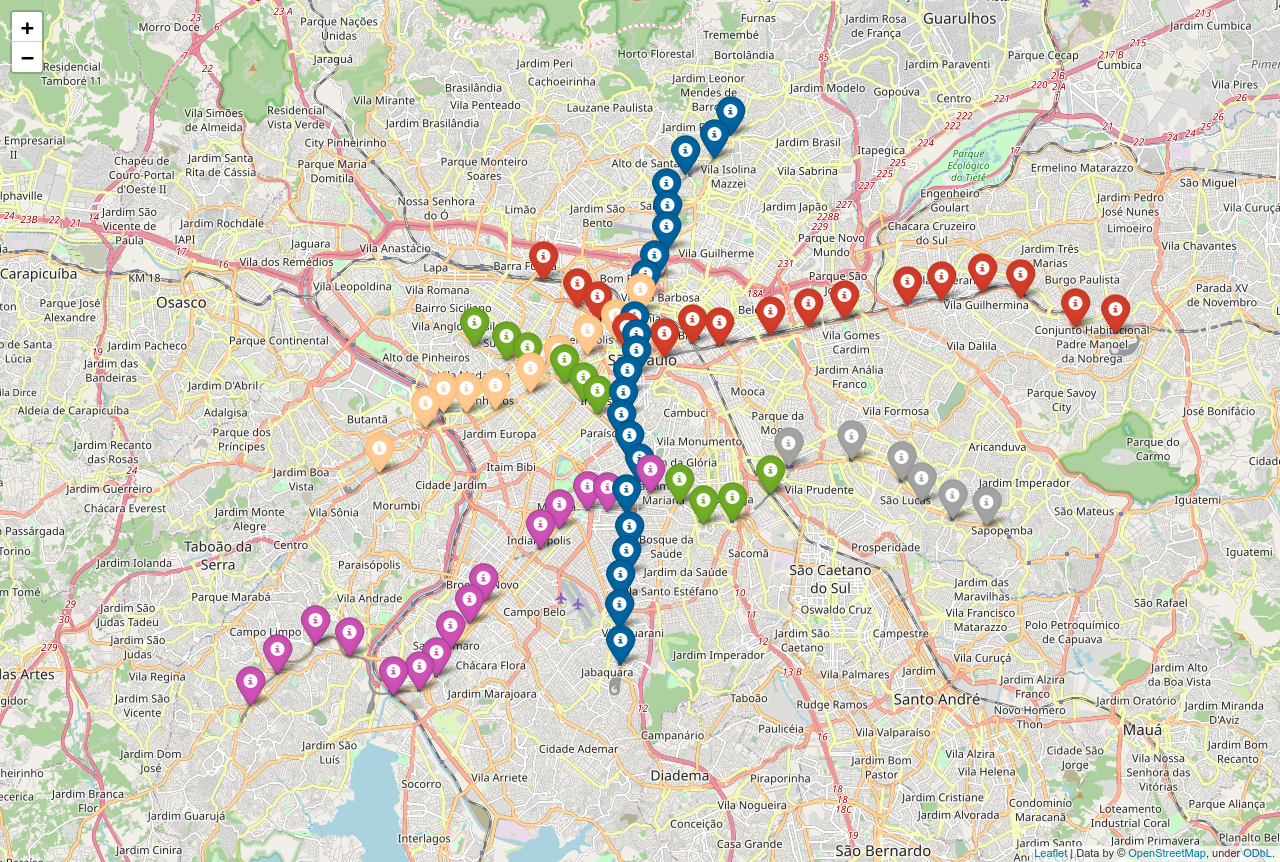

In [18]:
i

<br/>

In [22]:
"""
This is a boilerplate pipeline 'mdp'
generated using Kedro 0.17.6
"""

from typing import Dict, Any

import numpy as np
import pandas as pd
import geopandas
import folium


def tratamento(data: pd.DataFrame) -> pd.DataFrame:
    r"""
    tratamento
    """
    cores = {
        "azul": "darkblue",
        "verde": "green",
        "vermelha": "red",
        "amarela": "beige",
        "lilas": "purple",
        "prata": "lightgray",
    }

    data["cor"] = data["line"].apply(
        lambda x: cores[
            sorted(x.strip("[]").replace("'", "").replace(" ", "").split(","))[0]
        ]
    )

    return data


def grafo(data: pd.DataFrame) -> Dict:
    r"""
    grafo
    """
    g = {
        r["station"]: {
            "neigh": r["neigh"].strip("[]").replace("'", "").replace(" ", "").split(","),
            "pos": (r["lat"], r["lon"]),
        }
        for _, r in data.iterrows()
    }
    return g

def funcao_custo(s, S):
    r"""
    funcao_custo
    """
    sy, sx = s["pos"][0], s["pos"][1]
    Sy, Sx = S["pos"][0], S["pos"][1]
    return ((sx - Sx) ** 2 + (sy - Sy) ** 2) ** (0.5)

def custo(mdp_grafo: Dict) -> Dict:
    r"""
    custo
    """
    c = dict()
    for s in mdp_grafo:
        for S in mdp_grafo[s]["neigh"]:
            c[(s, S)] = funcao_custo(mdp_grafo[s], mdp_grafo[S])
    return c


class Node:
    r"""
    class Node
    """

    def __init__(self, state, cost, parent=None, action=None):
        self.state = state
        self.cost = cost
        self.parent = parent
        self.action = action

        if self.parent:
            self.depth = self.parent.depth + 1
        else:
            self.depth = 0

    def __repr__(self):
        return "<Node {}>".format(self.state)


class Stack:
    r"""
    class Stack
    """

    def __init__(self):
        self.items = []

    def push(self, item):
        self.items.append(item)

    def pop(self):
        return self.items.pop()

    def peek(self):
        return self.items[len(self.items) - 1]

    def __len__(self):
        return len(self.items)


class Problem(object):
    r"""
    class Problem
    """

    def __init__(self, data, s0="luz", s="luz"):
        self.states = grafo(data)
        self.costs = custo(self.states)
        self.goal = s
        self.start = s0

    def start(self):
        return self.start

    def is_state(self, state):
        return state in self.states

    def actions(self, state):
        if state in self.states:
            return self.states[state]["neigh"]
        else:
            return None

    def next_state(self, state, action):
        if action in self.actions(state):
            return action
        else:
            return None

    def is_goal_state(self, state):
        return state == self.goal

    def cost(self, state, action):
        return self.costs[(state, action)]


def depthFirstSearch(problem):
    r"""
    depthFirstSearch
    """
    node = Node(problem.start, 0)
    frontier = Stack()
    frontier.push(node)
    explored = set()
    while len(frontier) > 0:
        node = frontier.pop()
        explored.add(node.state)

        if problem.is_goal_state(node.state):
            return node

        for act in problem.actions(node.state):
            next_state = problem.next_state(node.state, act)
            if next_state not in explored:
                cost = problem.cost(node.state, act) + node.cost
                frontier.push(Node(next_state, cost, node, act))
    return None


In [34]:
p = Problem(df, 'butanta', 'corinthians-itaquera')
estados = p.states

In [35]:
a = depthFirstSearch(p)

<br/>

In [48]:
parent = a

points = list()

while parent != None:
    points.append( parent.state )
    parent = parent.parent

In [49]:
points

['corinthians-itaquera',
 'artur-alvim',
 'patriarca-vila-re',
 'guilhermina-esperanca',
 'vila-matilde',
 'penha',
 'carrao',
 'tatuape',
 'belem',
 'bresser-mooca',
 'bras',
 'pedro-ii',
 'se',
 'anhangabau',
 'republica',
 'higienopolis-mackenzie',
 'paulista',
 'oscar-freire',
 'fradique-coutinho',
 'faria-lima',
 'pinheiros',
 'butanta']

.